<a href="https://colab.research.google.com/github/hiralshah2001/employee_attrition/blob/main/GroupD_Step_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AISC1006 Group D: Project: Employee Atrrition Prediction
### Objective: Our main goal is to predict whether the employee leave or not.

In [ ]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Employee.csv")

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(4653, 9)

## Checking for duplicates and missing values

In [ ]:
# Checking if there is any missing values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
# Checking if there is any duplicate values
df.duplicated().sum()

1889

## Dropping the duplicates

In [ ]:
# dropping the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# Checking the shape after removing the duplicates
df.shape

(2764, 9)

## Summary Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [ ]:
# Checking the data types
list(df.dtypes.unique())

[dtype('O'), dtype('int64')]

In [ ]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,2764,2764.000000,2764,2764.000000,2764.000000,2764,2764,2764.000000,2764.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,1971,NaN,1171,NaN,NaN,1529,2403,NaN,NaN
mean,NaN,2015.090449,NaN,2.636035,30.952967,NaN,NaN,2.644356,0.393632
std,NaN,1.885943,NaN,0.624001,5.108872,NaN,NaN,1.610610,0.488643
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,2.000000,27.000000,NaN,NaN,1.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,30.000000,NaN,NaN,2.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,35.000000,NaN,NaN,4.000000,1.000000


# Data Visualization

### Analyzing Gender Column

In [ ]:
# Univariate analysis on Gender
df['Gender'].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

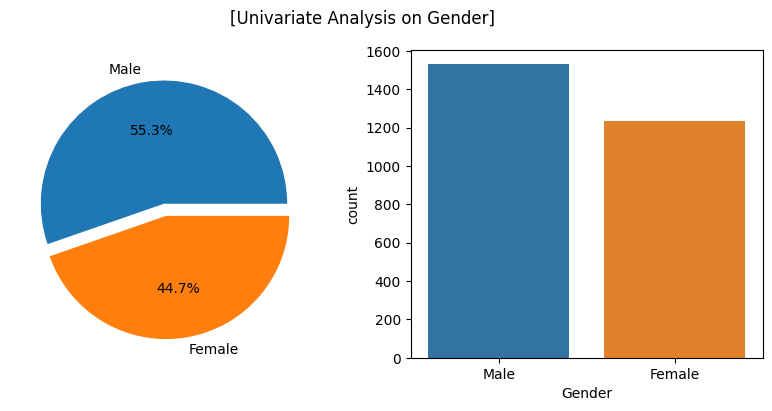

In [ ]:
plt.figure(figsize=(10,4))

# for pie chart (1st plot)
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%',explode=[0,0.1])

# for bar chart (2nd plot)
plt.subplot(1,2,2)
sns.countplot(data=df, x=df['Gender'])

plt.suptitle('[Univariate Analysis on Gender]')
plt.show()

Text(0.5, 1.0, '[Bivariate Analysis on Gender]')

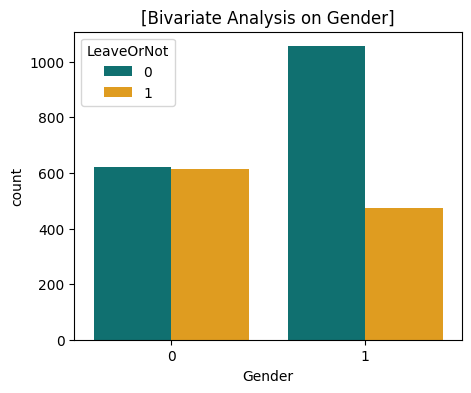

In [ ]:
# Bivariate analysis on Gender vs LeaveOrNot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df['Gender'], hue=df['LeaveOrNot'], palette=['teal', 'orange'])
plt.title('[Bivariate Analysis on Gender]')

## Analyzing City Column

In [ ]:
# Univariate analysis on City
df['City'].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

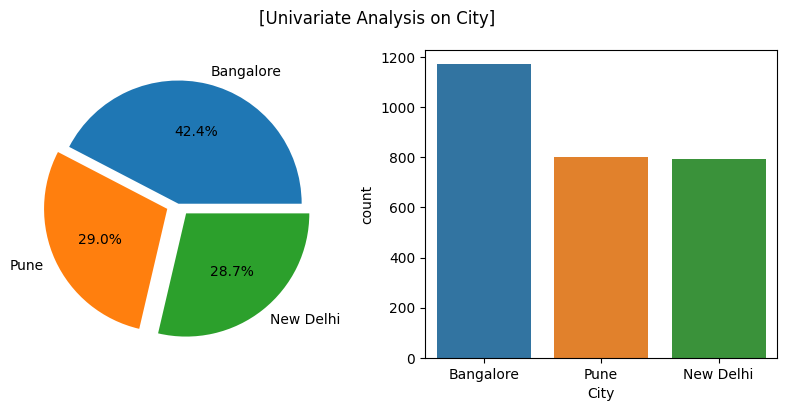

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts().index, autopct='%1.1f%%',explode=[0,0.1, 0.1])

plt.subplot(1,2,2)
sns.countplot(data=df, x=df['City'])

plt.suptitle('[Univariate Analysis on City]')
plt.show()

Text(0.5, 1.0, '[Bivariate Analysis on City]')

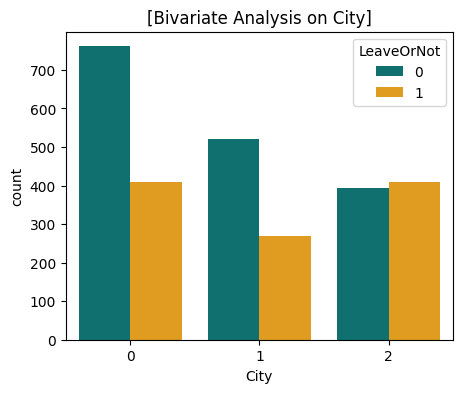

In [ ]:
# Bivariate analysis on Gender vs LeaveOrNot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df['City'], hue=df['LeaveOrNot'], palette=['teal', 'orange'])
plt.title('[Bivariate Analysis on City]')

## Analyzing Education Column

In [ ]:
# Univariate analysis on Education
df['Education'].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

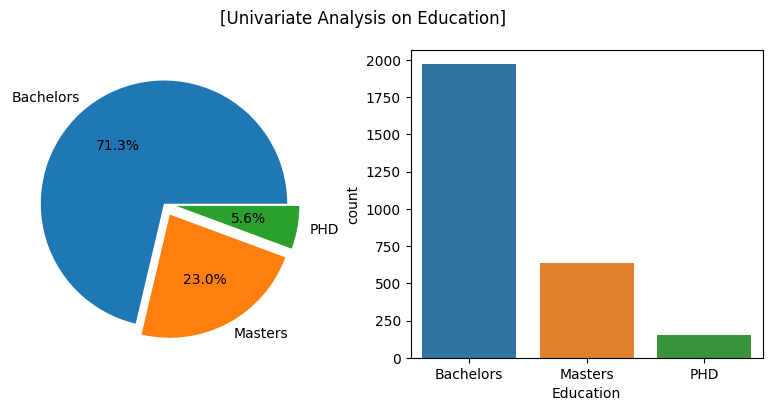

In [ ]:
# Plotting the Education column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, autopct='%1.1f%%',explode=[0,0.1,0.1])

plt.subplot(1,2,2)
sns.countplot(data=df, x=df['Education'])

plt.suptitle('[Univariate Analysis on Education]')
plt.show()

Text(0.5, 1.0, '[Bivariate Analysis on Education]')

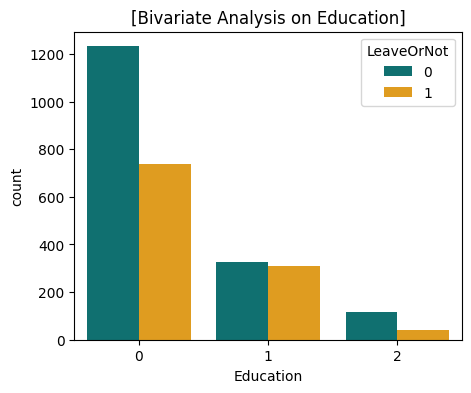

In [ ]:
# Bivariate analysis on Education vs LeaveOrNot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df['Education'], hue=df['LeaveOrNot'], palette=['teal', 'orange'])
plt.title('[Bivariate Analysis on Education]')

## Analyzing PaymentTier Column

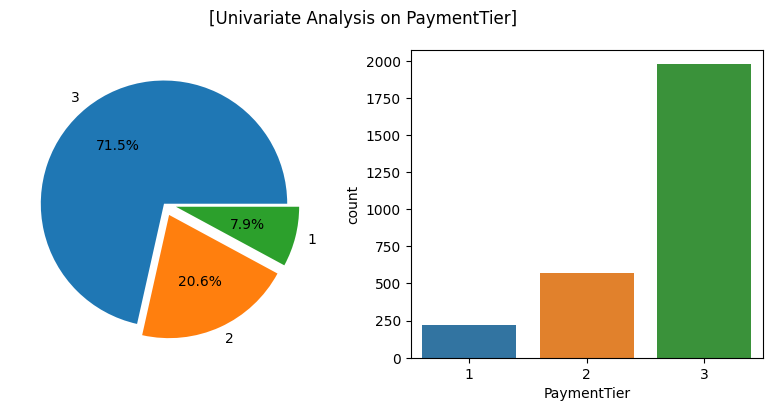

In [ ]:
# Plotting the PaymentTier column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie(df['PaymentTier'].value_counts(), labels=df['PaymentTier'].value_counts().index, autopct='%1.1f%%',explode=[0,0.1,0.1])

plt.subplot(1,2,2)
sns.countplot(data=df, x=df['PaymentTier'])

plt.suptitle('[Univariate Analysis on PaymentTier]')
plt.show()

Text(0.5, 1.0, '[Bivariate Analysis on PaymentTier]')

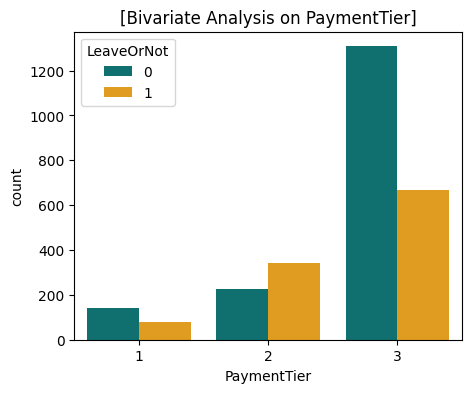

In [ ]:
# Bivariate analysis on PaymentTier vs LeaveOrNot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df['PaymentTier'], hue=df['LeaveOrNot'], palette=['teal', 'orange'])
plt.title('[Bivariate Analysis on PaymentTier]')

## Analyzing Age Column

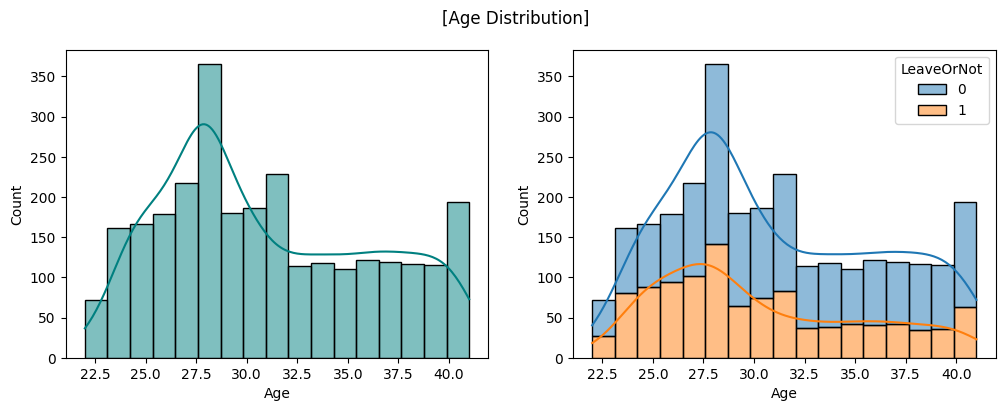

In [ ]:
# Age distribution
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df, x='Age', color='teal', kde=True)

plt.subplot(1,2,2)
sns.histplot(df, x='Age', hue= 'LeaveOrNot', color='teal', kde=True, multiple="stack")

plt.suptitle('[Age Distribution]')
plt.show()

## Analyzing EverBenched Column

<Axes: xlabel='EverBenched', ylabel='count'>

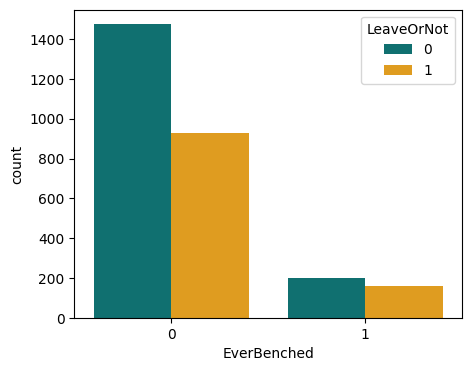

In [ ]:
# Plotting Ever-Benched
plt.figure(figsize=(5,4))
sns.countplot(df, x='EverBenched', hue='LeaveOrNot', palette=['teal', 'orange'])

## Analyzing JoiningYear Column

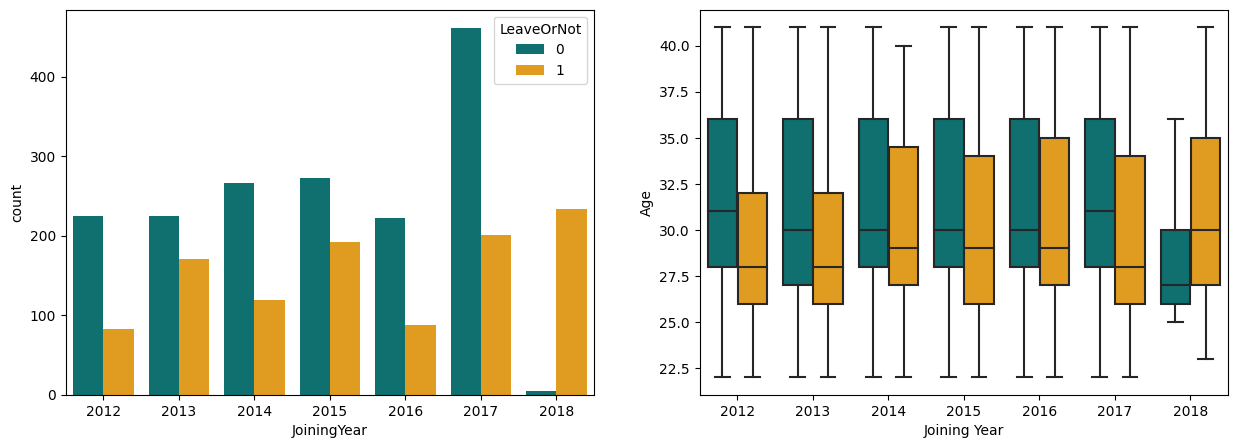

In [ ]:
# Plotting Joining year vs LeaveOrNot
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df, x='JoiningYear', hue='LeaveOrNot', palette=['teal', 'orange'])

plt.subplot(1,2,2)
sns.boxplot(x="JoiningYear", y="Age", hue="LeaveOrNot", data=df, palette=['teal', 'orange'])
plt.xlabel("Joining Year")
plt.ylabel("Age")
plt.legend([],[], frameon=False)


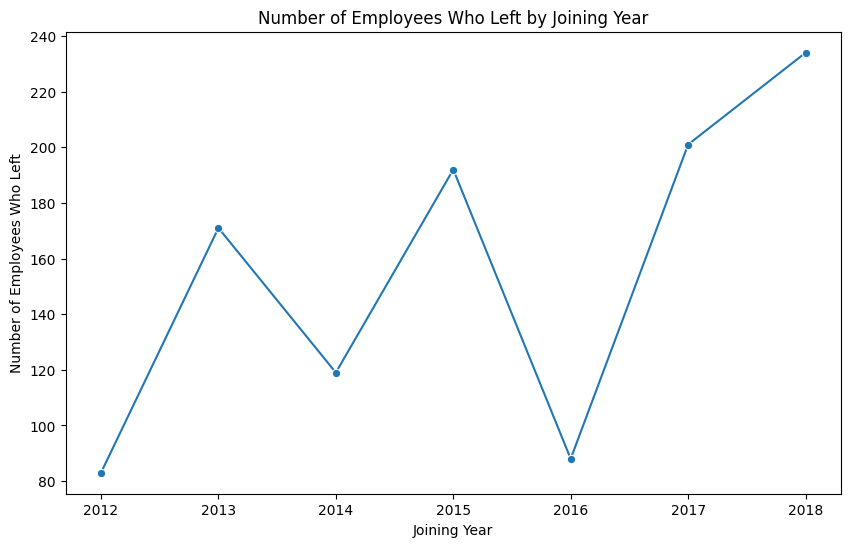

In [ ]:
leave_counts = df[df['LeaveOrNot'] == 1].groupby('JoiningYear').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(x="JoiningYear", y="Count", data=leave_counts, marker='o', palette="Set1")
plt.title("Number of Employees Who Left by Joining Year")
plt.xlabel("Joining Year")
plt.ylabel("Number of Employees Who Left")
plt.show()

## Transforming Categorical Columns

In [ ]:
# Identifying Categorical Columns
list(df.select_dtypes(include=['object']).columns)

['Education', 'City', 'Gender', 'EverBenched']

In [ ]:
# Identifying unique values in the categorical columns
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

## Using LabelEncoder assinging unique integer to the categorical values

In [ ]:
le=LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])
df["City"] = le.fit_transform(df["City"])
df["Gender"] = le.fit_transform(df["Gender"])
df["EverBenched"] = le.fit_transform(df["EverBenched"])

In [ ]:
df['Education'].unique()

array([0, 1, 2])

In [ ]:
df['City'].unique()

array([0, 2, 1])

In [ ]:
df['Gender'].unique()

array([1, 0])

In [ ]:
df['EverBenched'].unique()

array([0, 1])

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


## Correlation Plot

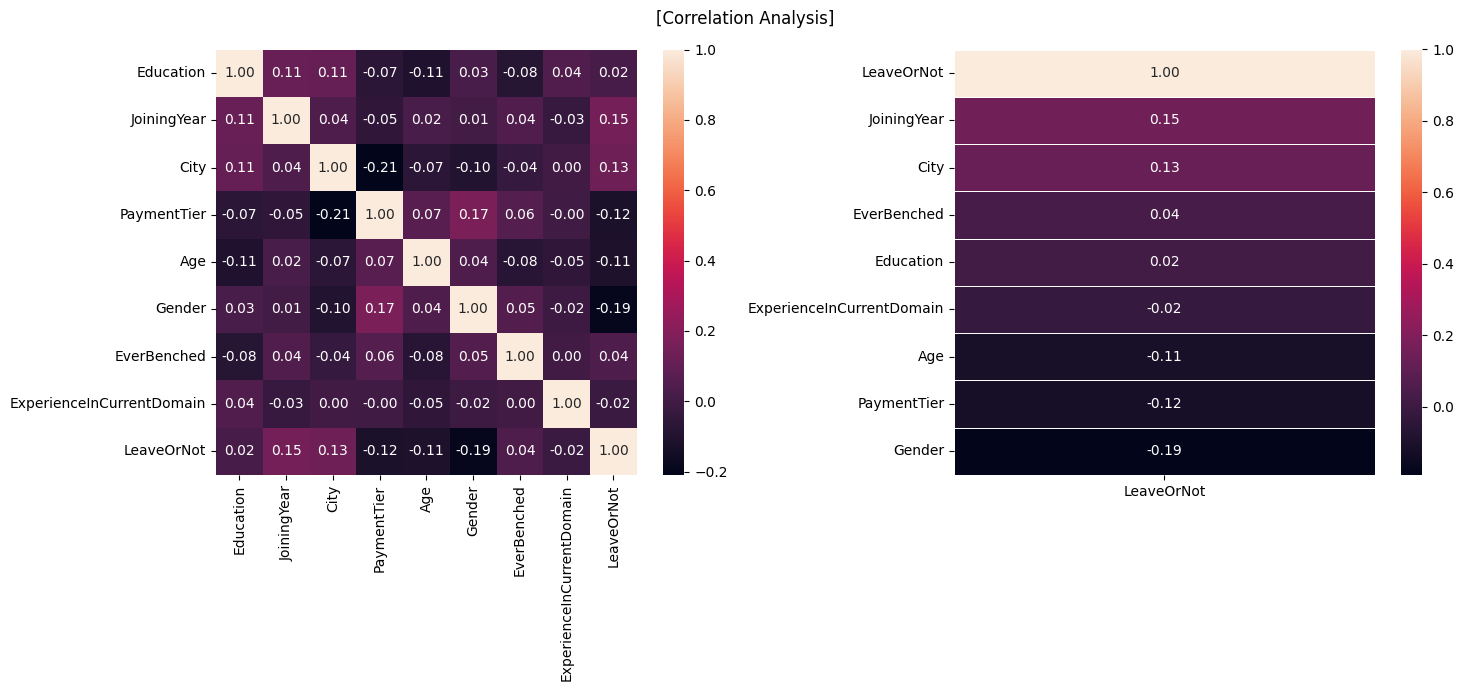

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

plt.subplot(1,2,2)
sns.heatmap(correlation_matrix[['LeaveOrNot']].sort_values(by='LeaveOrNot', ascending=False),
            annot=True, linewidths=0.5, fmt='0.2f')

plt.suptitle("[Correlation Analysis]")
plt.tight_layout()
plt.show()

# Explaining the working of LabelEncoder vs OnehotEncoder with example

In [ ]:
# Just for the explanation purpose
df_sample = {'State':['Gujarat', 'Rajasthan', 'UP'],
             'City':['Ahmedabad', 'Udaipur', 'Agra'],
             'Sales':[1,2,3]}

In [ ]:
df_sample = pd.DataFrame(df_sample)

In [ ]:
df_sample.head()

,State,City,Sales
0,Gujarat,Ahmedabad,1
1,Rajasthan,Udaipur,2
2,UP,Agra,3


In [ ]:
df_sample['State'] = le.fit_transform(df_sample['State'])

In [ ]:
df_sample.head()

,State,City,Sales
0,0,Ahmedabad,1
1,1,Udaipur,2
2,2,Agra,3


In [ ]:
pd.get_dummies(df_sample, columns = ['City'])

,State,Sales,City_Agra,City_Ahmedabad,City_Udaipur
0,0,1,0,1,0
1,1,2,0,0,1
2,2,3,1,0,0
